# Insurance Cross sell

## Content

    1. Introduction
        1.1 Dataset information
        1.2 Import and Data Cleaning
    2. Variable Analysis 
        2.1 Individual Variables Characteristics 
        2.2 Motor Insurance Variable analysis
        2.3 Policy Variable Analysis
        2.4 Outliers
        2.5 Correlation Table 
    3. Train / Test data split 
    4. Model prediction 
        4.1 Generalized Linear Model 
        4.2 Generalized Linear Model 
        4.3 Random Forest Model 
    5. Conclusion

## 1) Introduction

### 1.1 Dataset information

**Content**

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

id: Unique ID for the customer <br>
Gender: Gender of the customer <br>
Age: Age of the customer <br>
Driving_License	0: Customer does not have DL, 1: Customer already has DL <br>
Region_Code: Unique code for the region of the customer <br>
Previously_Insured	1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance <br>
Vehicle_Age: Age of the Vehicle <br>
Vehicle_Damage	1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past. <br>
Annual_Premium: The amount customer needs to pay as premium in the year <br>
PolicySalesChannel: Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc. <br>
Vintage: Number of Days, Customer has been associated with the company <br>
Response	1 : Customer is interested, 0 : Customer is not interested

**References**<br>
https://www.kaggle.com/anmolkumar/health-insurance-cross-sell-prediction

### 1.2 Import and Data Cleaning

In [1]:
# Import necessary libraries and dataset
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import libraries for Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
os.chdir("D:\\Folders\\Documents\\Insurance Cross-sell")
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

In [3]:
train.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [4]:
train.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [5]:
test.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
dtype: int64

**Data Cleaning Notes** <br>
    1) Gender was changed to 0 for Male and 1 for Female <br>
    2) Region Code was changed to an integer <br>
    3) Vehicle Age was characterized as follows: <br>
        &nbsp;&nbsp;&nbsp;a) "> 2 Years" - 2 <br>
        &nbsp;&nbsp;&nbsp;b) "1-2 Years" - 1 <br>
        &nbsp;&nbsp;&nbsp;c) "< 1 Year" - 0 <br>
    4) Vehicle_Damage was changed to 0 for No and 1 for Yes <br>
    5) Policy_Sales_Channel was changed to an integer

In [5]:
# Gender changed to 0 for Male and 1 for Female
train['Gender'].loc[(train['Gender'] == "Male")] = 0
train['Gender'].loc[(train['Gender'] == "Female")] = 1

D:\Programs\Anaconda\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [4]:
# Convert Region Code to integer
train['Region_Code'] = train['Region_Code'].astype(int)

In [6]:
# Vehicle Age was change as follows:
train['Vehicle_Age'].loc[(train['Vehicle_Age'] == '> 2 Years')] = 2
train['Vehicle_Age'].loc[(train['Vehicle_Age'] == '1-2 Year')] = 1
train['Vehicle_Age'].loc[(train['Vehicle_Age'] == '< 1 Year')] = 0

In [7]:
# Convert vehicle damage to 0 for No and 1 for Yes
train['Vehicle_Damage'].loc[(train['Vehicle_Damage'] == "No")] = 0
train['Vehicle_Damage'].loc[(train['Vehicle_Damage'] == "Yes")] = 1

In [8]:
# Convert Policy Sales Channel to integer
train['Policy_Sales_Channel'] = train['Policy_Sales_Channel'].astype(int)

In [9]:
# Convert Annual Premium to integer
train['Annual_Premium'] = train['Annual_Premium'].astype(int)

## 2) Variable Analysis

### 2.1) Individual Characteristics

Individual Characterisitics would include: Gender, Age, Region Code. We will analyze how these variables interact with the remaining variables and if any additional features can be obtained from them

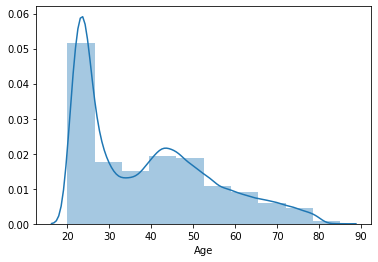

In [17]:
sns.distplot(train.Age,bins = 10)

We can see that the distribution of the age is left skewed. Younger Generation will dominate the dataset. However, as shown below, it doesn't seem like age or gender has a big impact on the Annual Premium

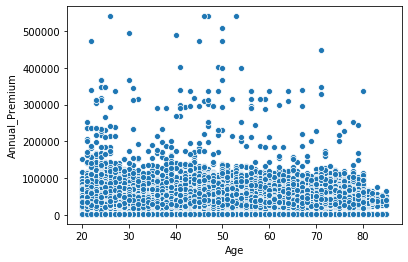

In [22]:
sns.scatterplot(data = train, x = 'Age', y = "Annual_Premium")

We see that there are outliers for Annual_Premium. There seem to be fewer outliers as age increases. We will take a closer look at these outliersin section 2.3

In [52]:
# Create a pivot table for total Annual Premium
pivot = train.pivot_table("Annual_Premium",["Region_Code"], "Gender",
                         aggfunc = 'sum')

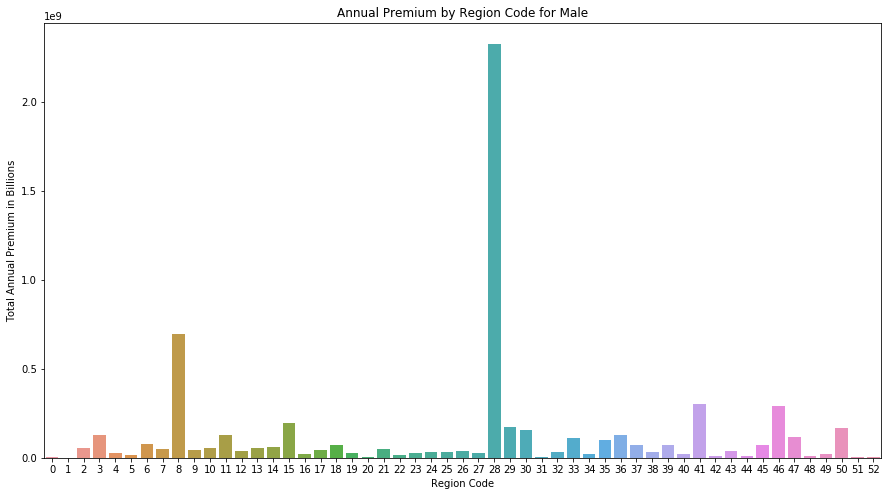

In [58]:
# Annual Premium by Region Code for Male
plt.figure(figsize = (15,8))
plt.title('Annual Premium by Region Code for Male')
plt.xlabel('Region Code')
plt.ylabel('Total Annual Premium in Billions')
sns.barplot(x = list(range(0,53)), y = list(round(pivot[0],2)))

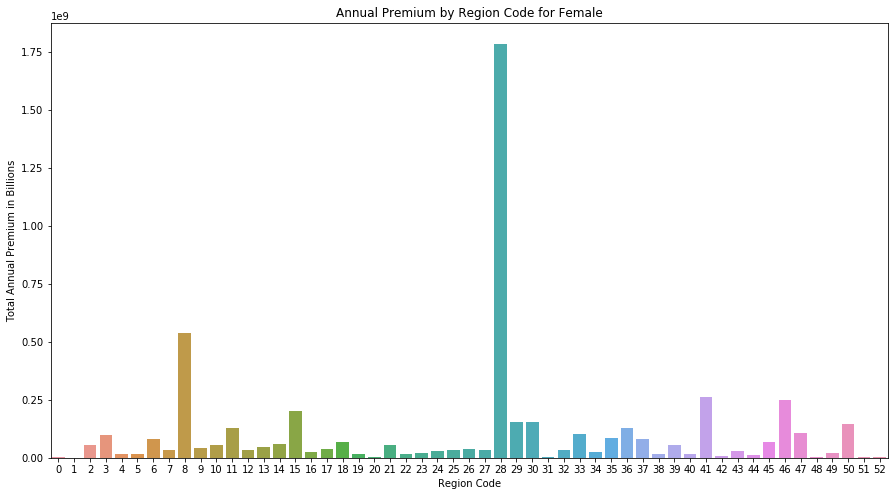

In [60]:
# Annual Premium by Region Code for Female
plt.figure(figsize = (15,8))
plt.title('Annual Premium by Region Code for Female')
plt.xlabel('Region Code')
plt.ylabel('Total Annual Premium in Billions')
sns.barplot(x = list(range(0,53)), y = list(round(pivot[1],2)))

It seems that the region 28 produces the majority of the premium. Male seem to have a much higher premium from premium 28 than female. We also notice that the other regions, except for region 8, don't seem to produce a lot of premium.

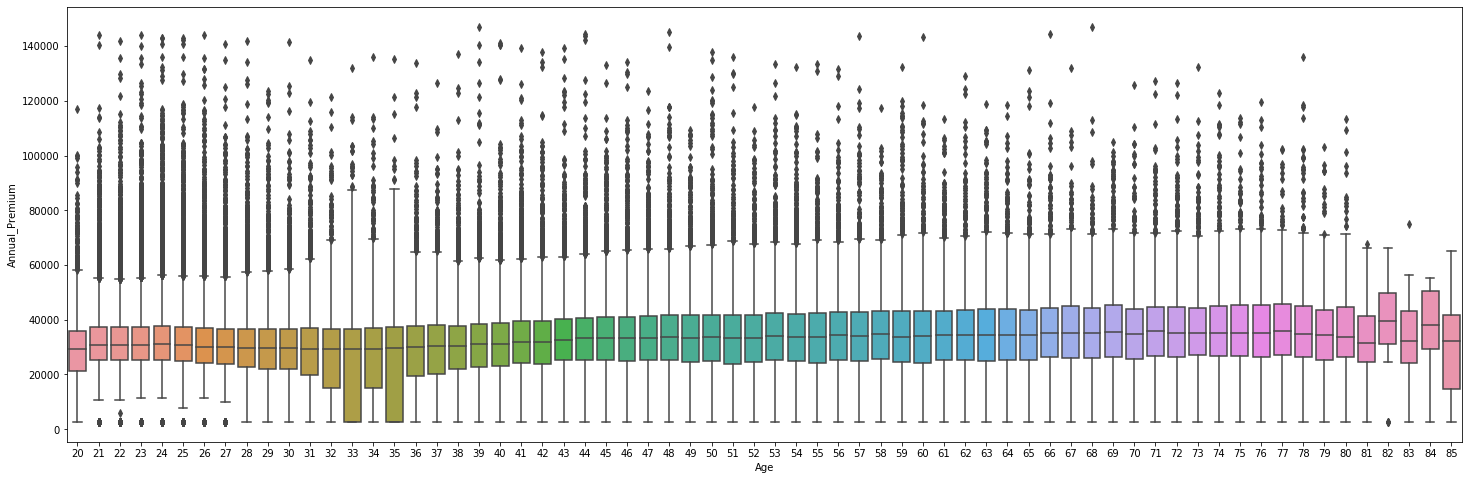

In [76]:
plt.figure(figsize = (25,8))
sns.boxplot(x = train[train['Annual_Premium'] < 150000]['Age'],
                y = train[train['Annual_Premium'] < 150000]['Annual_Premium'])

From the boxplot above, it seems that the annual premium doesn't seem to change much over the course of age for the filtered dataset. Aside, from the outliers, the majority of the premium seems to be in the same range. In Age 33 and 35, there seems to be low annual premium as compared to the other ages.

### 2.2) Motor Insurance variable analysis

In [11]:
print('Number of people not previoustly insured: ', 
      train['Previously_Insured'].value_counts()[0],
     '\nNumber of people previously insured: ',
     train['Previously_Insured'].value_counts()[1])
print('Average Premium - People not previously insured',
      round(train[train['Previously_Insured'] == 0]['Annual_Premium'].mean(),2),
      '\nAverage Premium - People previously insured',
      round(train[train['Previously_Insured'] == 1]['Annual_Premium'].mean(),2)
     )
print('Median Premium - People not previously insured',
      train[train['Previously_Insured'] == 0]['Annual_Premium'].median(),
      '\nMedian Premium - People previously insured',
      train[train['Previously_Insured'] == 1]['Annual_Premium'].median()
     )

Number of people not previoustly insured:  206481 
Number of people previously insured:  174628
Average Premium - People not previously insured 30496.82 
Average Premium - People previously insured 30644.29
Median Premium - People not previously insured 32275.0 
Median Premium - People previously insured 31053.5


From the above we can see that people not previously insured have a higher premium than people previously insured. This can be due to a prior history which more accurately reflects the premium of the individual. As the previously uninsured individuals have no prior claim history, their premium is not reflective of the risk the individual carries

In [12]:
print('Number of Individuals with no vehicle damage: ', 
      train['Vehicle_Damage'].value_counts()[0],
     '\nNumber of Individuals with vehicle damage: ',
     train['Vehicle_Damage'].value_counts()[1])
print('Average Premium - no vehicle damage',
      round(train[train['Vehicle_Damage'] == 0]['Annual_Premium'].mean(),2),
      '\nAverage Premium - with vehicle damage',
      round(train[train['Vehicle_Damage'] == 1]['Annual_Premium'].mean(),2)
     )
print('Median Premium - no vehicle damage',
      train[train['Vehicle_Damage'] == 0]['Annual_Premium'].median(),
      '\nMedian Premium - with vehicle damage',
      train[train['Vehicle_Damage'] == 1]['Annual_Premium'].median()
     )

Number of Individuals with no vehicle damage:  188696 
Number of Individuals with vehicle damage:  192413
Average Premium - no vehicle damage 30401.88 
Average Premium - with vehicle damage 30723.76
Median Premium - no vehicle damage 30982.0 
Median Premium - with vehicle damage 32459.0


We also see that there is an increase in premium for vehicles with prior damage. This is due to the individual's prior claim history which ultimately affects their premium

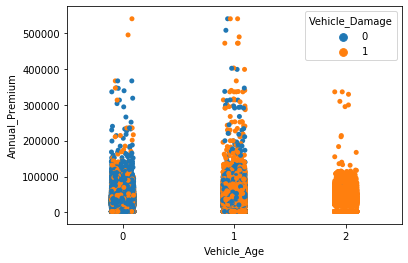

In [56]:
sns.stripplot(x = 'Vehicle_Age', y = 'Annual_Premium', hue = 'Vehicle_Damage',
              data = train)

We see that vehicles that are between 0 - 1 years old have a higher annual premium. We also note that vehicles that are 1 year old have more vehicle damage than new vehicles. The vast majority of the vehicles 2 years old have vehicle damage

### 2.3) Policy Variables Analysis

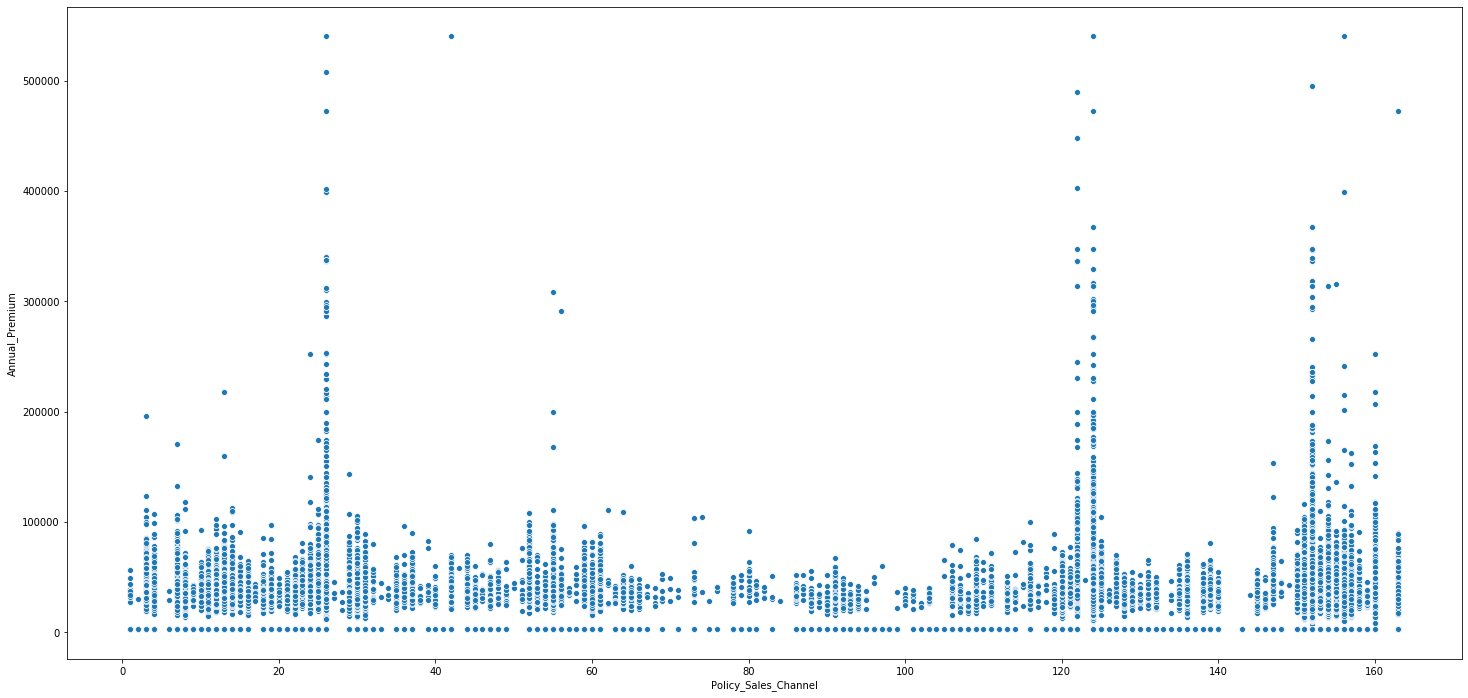

In [70]:
plt.figure(figsize = (25,12))
sns.scatterplot(x = 'Policy_Sales_Channel', y ='Annual_Premium', data = train)

We see that there are policy channels that provide more gross premium than other policy channels. We will look at the top 5 policy sales channels

In [95]:
list1 = [152,26,124,160,122]
print(train.pivot_table("Annual_Premium",["Policy_Sales_Channel"], aggfunc = 'sum').sort_values('Annual_Premium',ascending = False).head(5)
      ,"\n\nTotal premium earned as a percentage of total premium of the top 5 policy sales channel: ",
      str(round((train[train['Policy_Sales_Channel'].isin(list1)]['Annual_Premium'].sum())/(train['Annual_Premium'].sum())*100,2)) + "%")

                      Annual_Premium
Policy_Sales_Channel                
152                     4.163369e+09
26                      2.682243e+09
124                     2.346396e+09
160                     5.570141e+08
122                     3.667990e+08 

Total premium earned as a percentage of total premium of the top 5 policy sales channel:  86.84%


Text(0, 0.5, 'Gross Premium (Billions)')

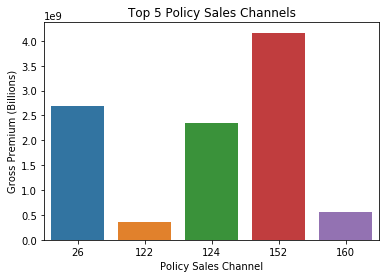

In [13]:
sns.barplot(x = [152,26,124,160,122],
           y = [4.163369e+09,2.682243e+09,2.346396e+09, 5.570141e+08,
               3.667990e+08])
plt.title('Top 5 Policy Sales Channels')
plt.xlabel('Policy Sales Channel')
plt.ylabel('Gross Premium (Billions)')

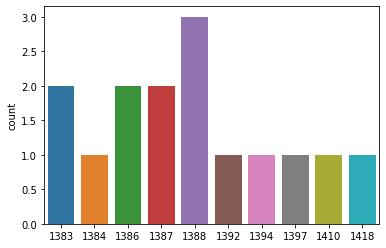

In [50]:
sns.countplot(list(train['Vintage'].value_counts().head(15)))

### 2.4) Outliers

During our analysis we noted that there were significant outliers in the dataset. The main outliers had an annual premium of above 300,000. We will look at these outliers closely and consider whether or not we can eliminate these outliers. We have identified 51 such outliers

In [69]:
# Outliers
outliers = train[train['Annual_Premium'] > 300000].sort_values('Annual_Premium', ascending = False)

In [74]:
len(outliers)

51

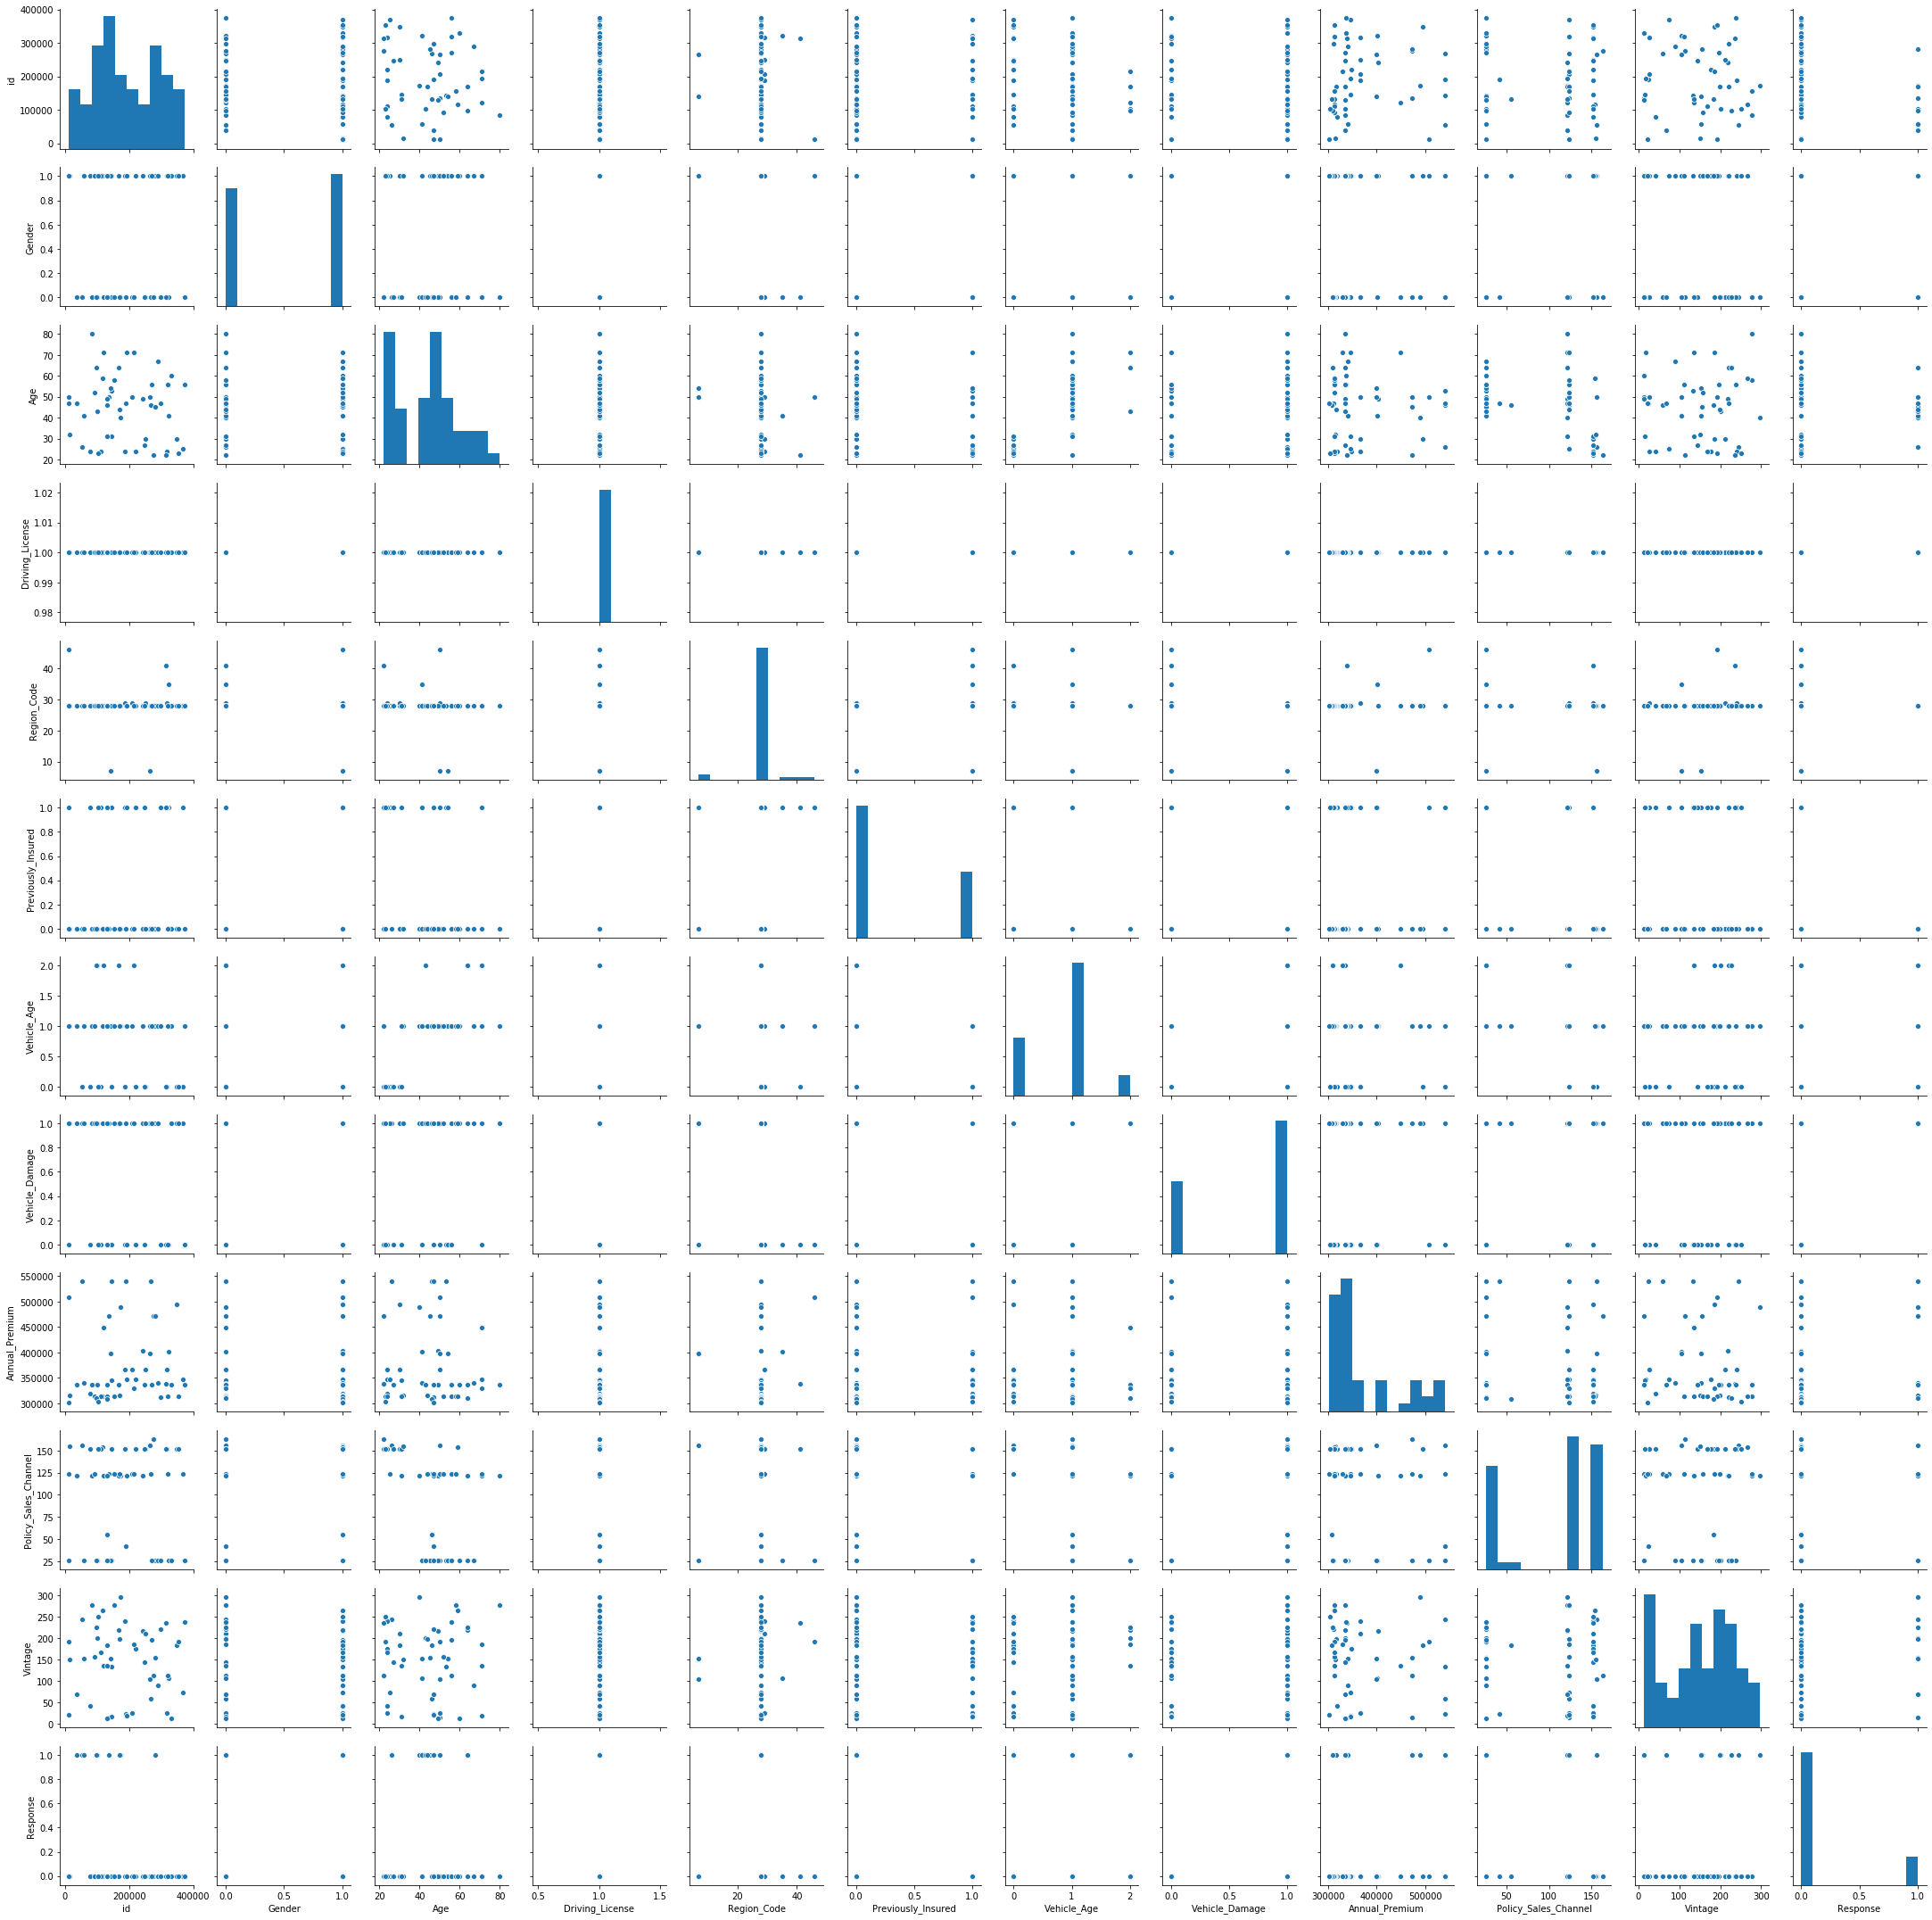

In [70]:
sns.pairplot(outliers, palette = 'coolwarm')

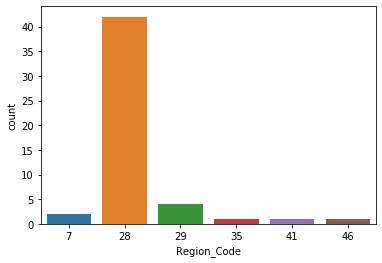

In [73]:
sns.countplot(outliers['Region_Code'])

Based on our analysis, the vast majority of the outliers are from region 28. This may be due to cars in this particular region being of higher value. Based on the pair plots above, there does not seem to be any other correlation between the high gross premium and other factors

In [91]:
outlier_perc = round(outliers['Annual_Premium'].sum() / train['Annual_Premium'].sum() * 100,2)
print('We see that the outliers of annual premium equate to {}% of the total gross premium. As a result we will eliminate these outliers'.format(str(outlier_perc)))

We see that the outliers of annual premium equate to 0.16% of the total gross premium. As a result we will eliminate these outliers


### 2.5) Correlation Table

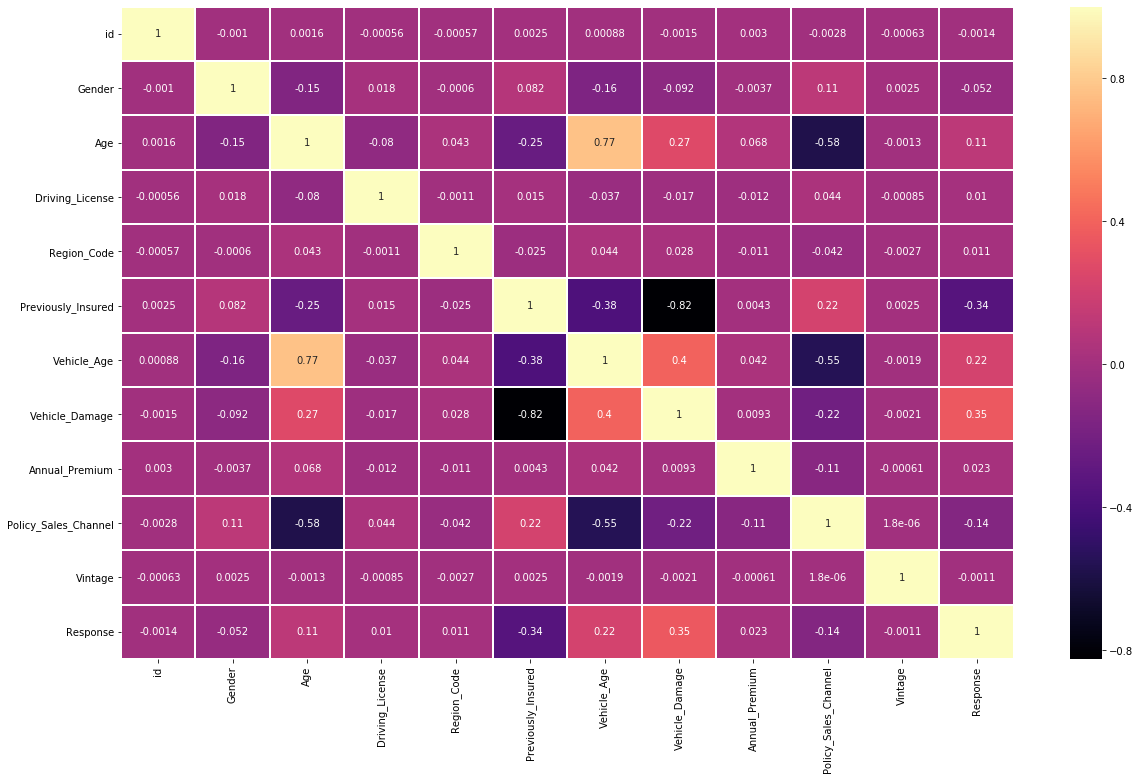

In [93]:
plt.figure(figsize = (20,12))
corr_data = train.corr()
sns.heatmap(corr_data, annot = True, cmap = 'magma', linecolor = 'white',
           linewidths = 1)

As shown above, we see that Age has an inverse relationship with Policy Sales Channel. It also has a very positive relationship with Vehicle Age. This may be due to people keeping the same vehicle as they get older.
<br>Individuals that were previously insured are less likely to be part of the older population. If the vehicle was damaged, the individual was less likely to be previously insured. This is mainly due to insurers not wanting to insure damaged cars or individuals with a prior accident history. 
<br>We also see that Vehicle age has a direct relationship with vehicle damage. This would mean that vehicles that are older are more likely to be damaged. 
<br>The policy sales channel seems to have an indirect relationship with age. This would mean that individuals who are younger would respond better to the lower policy sales channel. The policy sales channel also has an inverse relationship with vehicle age. This would mean that newer vehicles would respond better to higher policy sales channels. 
<br>For the response variable, we see that previously insured has an inverse relationship. This would mean that individuals that were previously insured are less likely to respond with a yes. older vehicles and vehicles with damage are more likely to say yes.

## 3) Test Train Data Split

As shown above, we will format the test dataset in the same way we formatted the train dataset

In [10]:
# Gender changed to 0 for Male and 1 for Female
test['Gender'].loc[(test['Gender'] == "Male")] = 0
test['Gender'].loc[(test['Gender'] == "Female")] = 1

# Convert Region Code to integer
test['Region_Code'] = test['Region_Code'].astype(int)

# Vehicle Age was change as follows:
test['Vehicle_Age'].loc[(test['Vehicle_Age'] == '> 2 Years')] = 2
test['Vehicle_Age'].loc[(test['Vehicle_Age'] == '1-2 Year')] = 1
test['Vehicle_Age'].loc[(test['Vehicle_Age'] == '< 1 Year')] = 0

# Convert vehicle damage to 0 for No and 1 for Yes
test['Vehicle_Damage'].loc[(test['Vehicle_Damage'] == "No")] = 0
test['Vehicle_Damage'].loc[(test['Vehicle_Damage'] == "Yes")] = 1

# Convert Policy Sales Channel to integer
test['Policy_Sales_Channel'] = test['Policy_Sales_Channel'].astype(int)

# Convert Annual Premium to integer
test['Annual_Premium'] = test['Annual_Premium'].astype(int)

# Remove Annual Premium above 300,000 as shown above from the training dataset. There are a total of 10 values removed of which 6 are from Region Code 28
train = train[train['Annual_Premium'] < 300000].sort_values('Annual_Premium', ascending = False)

In [22]:
# Create the training dataset
x_train = train.iloc[:,1:11]
y_train = train['Response']

# Create the test dataset
test = test.sort_values('id', ascending = True)
test = test.iloc[:,1:11]

## 4) Model Selection

### 4.1) Generalized Linear Model

In [18]:
# Import logistic regression model
from sklearn.linear_model import LogisticRegression

# train the logmodel on the train dataset
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)

D:\Programs\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
# Coefficients for each feature
pd.DataFrame(zip(x_train.columns, np.transpose(logmodel.coef_)), 
             columns=['features', 'coef']) 

,features,coef
0,Gender,[-0.0029072319463005437]
1,Age,[-0.007994128726553675]
2,Driving_License,[-0.001973835925649245]
3,Region_Code,[-0.005691973652862381]
4,Previously_Insured,[-0.017445198293516182]
5,Vehicle_Age,[0.0077518529030280005]
6,Vehicle_Damage,[0.01627672434850809]
7,Annual_Premium,[-6.083585895143649e-06]
8,Policy_Sales_Channel,[-0.010192332441816642]
9,Vintage,[-0.0014214104909994962]


From the logistic model, we see that the annual premium has the most significant impact on the response (dependent variable). As the annual premium increases, the individual is less likely to respond yes to the insurance

In [24]:
# Create the predictions on the logmodel
predictions = logmodel.predict(test)

In [25]:
# Create the confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(sample_submission['Response'],predictions))

[[127037]]


In [29]:
from sklearn.metrics import classification_report
print(classification_report(sample_submission['Response'],predictions))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98    127037
           1       0.00      0.00      0.00         0

    accuracy                           0.96    127037
   macro avg       0.50      0.48      0.49    127037
weighted avg       1.00      0.96      0.98    127037



D:\Programs\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


### 4.2) Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
# Create the random forest
rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [28]:
# Predict the values
predictions = rfc.predict(test)

In [30]:
# Create the confusion matrix
print(confusion_matrix(sample_submission['Response'],predictions))

[[121680   5357]
 [     0      0]]


In [31]:
# Create the classification report
print(classification_report(sample_submission['Response'],predictions))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98    127037
           1       0.00      0.00      0.00         0

    accuracy                           0.96    127037
   macro avg       0.50      0.48      0.49    127037
weighted avg       1.00      0.96      0.98    127037



### 4.3) Naive Bayes Classifier

In [43]:
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()
nb_model.fit(x_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [45]:
predictions = nb_model.predict(test)

In [47]:
# Create the classification report
print(classification_report(sample_submission['Response'],predictions))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80    127037
           1       0.00      0.00      0.00         0

    accuracy                           0.67    127037
   macro avg       0.50      0.33      0.40    127037
weighted avg       1.00      0.67      0.80    127037



D:\Programs\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [48]:
# Create the confusion matrix
print(confusion_matrix(sample_submission['Response'],predictions))

[[85063 41974]
 [    0     0]]


## 5) Conclusion

Based on the prediction results above, it seems that the random forest model is the best predictor of the outcome based on the results.